In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("climate.csv")

In [3]:
df['Year'] = df['Date Time'].apply(lambda row: row.split('.')[2][0:4])

In [4]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016


In [5]:
df_climate = df.drop(['Date Time'], axis=1)

In [6]:
df_climate

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016


# Data Exploration

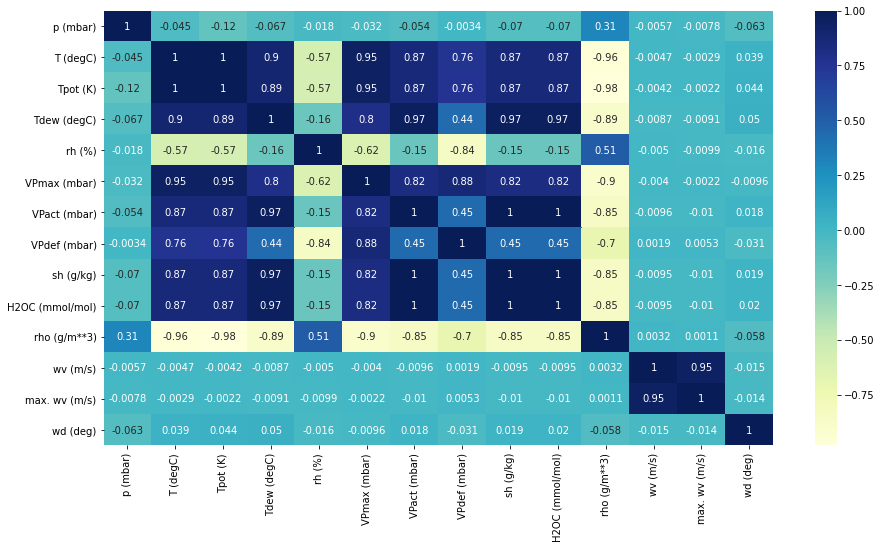

In [7]:
# Checking the correlation of each features in the given dataset
correlation = df_climate.corr()
corr_features = correlation.index
plt.figure(figsize=(15,8))
fig = sns.heatmap(df_climate[corr_features].corr(), annot=True, cmap="YlGnBu")

In [8]:
def pairing(data, seq_len=6):
    x = []
    y = []
    for i in range(0, (data.shape[0] - seq_len+1), seq_len+1):
        seq = data.iloc[i:i+seq_len]
        x.append(np.array(seq).flatten())
        y.append(data["T (degC)"][i+seq_len])
    return np.array(x), np.array(y)

In [9]:
x,y = pairing(df_climate)

In [115]:
# Feature Selection using SelectKBest
x_featured = SelectKBest(f_regression, k=10).fit_transform(x, y)

In [116]:
regressor_models = {
  #"Linear Regression": LinearRegression(),
  #"Extra Trees":   ExtraTreesRegressor(n_estimators=100),
  "Random Forest": RandomForestRegressor(n_estimators=100, verbose=True),
  #"AdaBoost":      AdaBoostRegressor(n_estimators=100)
}

In [117]:
tscv = TimeSeriesSplit()

In [118]:
for train_index, test_index in tscv.split(x_featured):
    scaler = StandardScaler()
    X_train, X_test = x_featured[train_index], x_featured[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [119]:
results = []
for name, model in regressor_models.items():
    start_time = time.time()
    print("Running " +str(name)+" Model")
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
    print("Done RF")
    prediction = model.predict(X_test)
    results.append({
        'ModelName': name,
        'MSE': metrics.mean_squared_error(prediction, y_test),
        'MAE': metrics.mean_absolute_error(prediction, y_test),
        'R2Score': metrics.r2_score(prediction, y_test),
        'Time': total_time})
pd.DataFrame(results)

Running Random Forest Model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Done RF


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


,ModelName,MSE,MAE,R2Score,Time
0,Random Forest,0.042168,0.134877,0.999279,32.105348


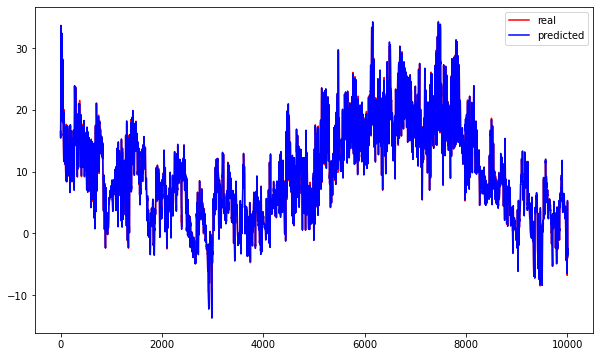

In [120]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="real", color="r")
plt.plot(prediction, label="predicted", color="b")
plt.legend()